### Description

In this playground competition, hosted in partnership with Google Cloud and Coursera, you are tasked with predicting the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations. While you can get a basic estimate based on just the distance between the two points, this will result in an RMSE of $5-$8, depending on the model used (see the starter code for an example of this approach in Kernels). Your challenge is to do better than this using Machine Learning techniques! 

### Evaluation Metric
The evaluation metric for this competition is the root mean-squared error or RMSE. RMSE measures the difference between the predictions of a model, and the corresponding ground truth. A large RMSE is equivalent to a large average error, so smaller values of RMSE are better. One nice property of RMSE is that the error is given in the units being measured, so you can tell very directly how incorrect the model might be on unseen data.

RMSE is given by:

                                 

where \\( y_i \\) is the ith observation and
     

is the prediction for that observation. 

Example 1. Suppose we have one observation, with an actual value of 12.5 and a prediction of 12.5 (good job!). The RMSE will be:

                       

Example 2. We'll add another data point. Your prediction for the second data point is 11.0 and the actual value is 14.0. The RMSE will be:

                                                

**Kernel Submissions**

You can make submissions directly from Kaggle Kernels. By adding your teammates as collaborators on a kernel, you can share and edit code privately with them.

**Submission File**

For each key in the test set, you must predict a value for the fare_amount variable. The file should contain a header and have the following format:

## Objectives

Determine the taxi fare given inputs using:
  * Tensorflow
  * PyTorch
  * Scikit Learn

## Doing the imports

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  torch
import torch.nn as nn
import tensorflow as tf
import os
import datetime
import plotly.offline as pyo
import plotly.graph_objs as go
%matplotlib inline

In [81]:
# df=pd.read_csv(os.getcwd()+"\\DATA\\taxi\\train.csv")

In [82]:
# df=pd.read_csv("./DATA/taxi/train.csv")

In [83]:
df=pd.read_csv("./DATA/taxi/NYCTaxiFares.csv")

In [84]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


### Game Plan

* Data cleaning and wrangling
* Data Visualization using matplotlib and/or plotly dash
* Feature Engineering -> transform all data into numeric values


In [86]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [87]:
#checking that no missing value is there
df.isna().sum()

pickup_datetime      0
fare_amount          0
fare_class           0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
# Data Visualization


Text(0.5, 1.0, 'distribution of fare amount')

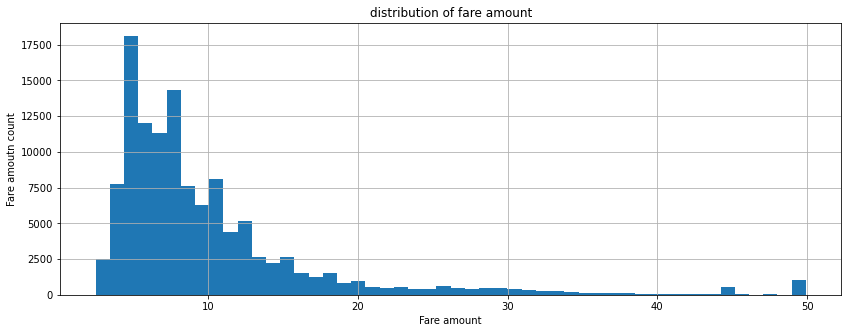

In [88]:
plt.figure(figsize=(14,5))
df["fare_amount"].hist(bins=50)
plt.xlabel("Fare amount")
plt.ylabel("Fare amoutn count")
plt.title("distribution of fare amount")

In [89]:
df["fare_class"].value_counts()

0    80000
1    40000
Name: fare_class, dtype: int64

<AxesSubplot:xlabel='fare_class', ylabel='count'>

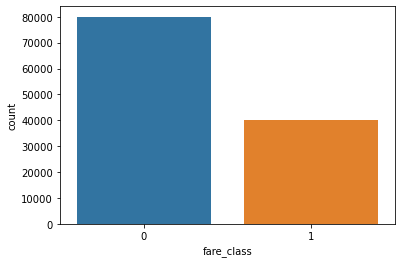

In [90]:
sns.countplot(x="fare_class", data=df)

In [91]:
df["passenger_count"].value_counts()

1    92531
2    18650
3     4874
4     2518
5     1427
Name: passenger_count, dtype: int64

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

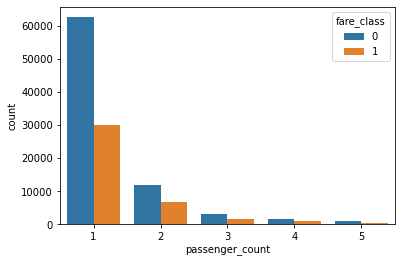

In [92]:
sns.countplot(x="passenger_count", data=df, hue="fare_class")

In [93]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


(40.6, 40.85)

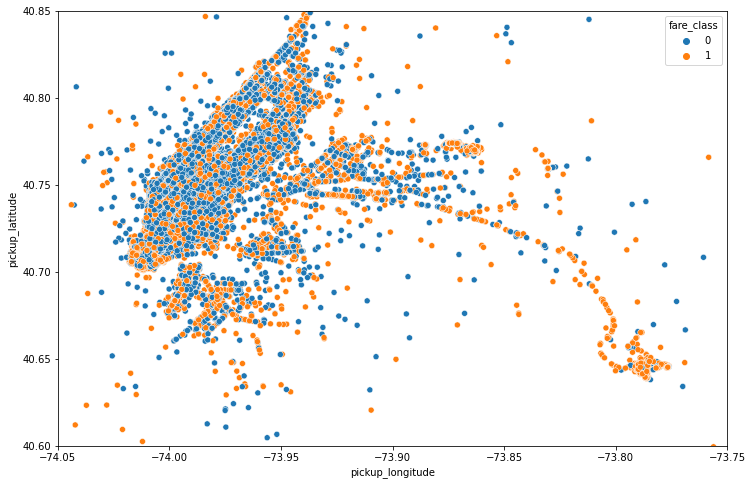

In [94]:
plt.figure(figsize=(12,8))

sns.scatterplot(x="pickup_longitude", y="pickup_latitude", data=df, hue="fare_class")
plt.xlim([-74.05,-73.75])
plt.ylim([40.6,40.85])

(40.55, 40.9)

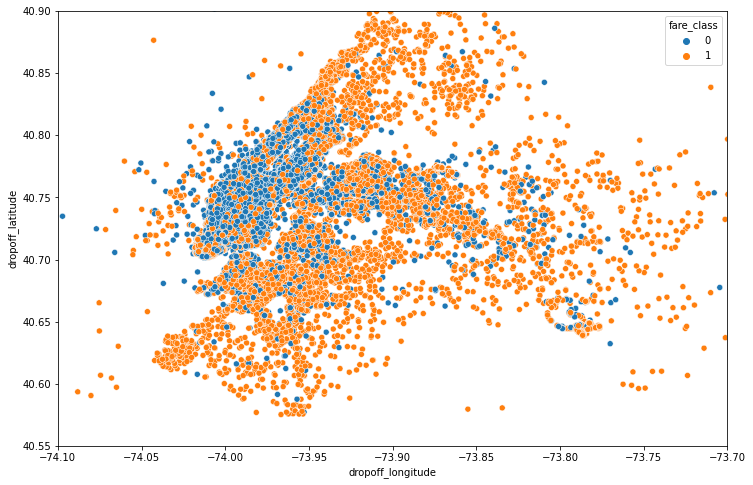

In [95]:
plt.figure(figsize=(12,8))

sns.scatterplot(x="dropoff_longitude", y="dropoff_latitude", data=df, hue="fare_class")
plt.xlim([-74.1,-73.7])
plt.ylim([40.55,40.9])

### Plotly visualization

In [96]:

# traces = go.Scattergeo(
#         lon = df["pickup_longitude"],
#         lat = df["pickup_latitude"],
#         hoverinfo = 'text',
#         text = "fare_amount",
#         mode = 'markers',
        
#         marker = dict( 
#             size=5, 
#             color = df["fare_class"],
#             line = dict(
#                 width=1,
#                 color = "white"
#             )))
# data=[traces]

# layout = go.Layout(
#     title = 'Geographical distribution of Taxi pick up points ',
#     hovermode='closest')
    
# fig=go.Figure(data, layout)

# pyo.plot(fig, filename="scatter.html")

In [97]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


In [99]:
# 4hour difference between UTC timestamps and location time - need to convert to eastern time EDT
df['EDTdate'] = pd.to_datetime(df['pickup_datetime'].str[:19]) - pd.Timedelta(hours=4)
df['Hour'] = df['EDTdate'].dt.hour
df['AMorPM'] = np.where(df['Hour']<12,'am','pm')
df['Weekday'] = df['EDTdate'].dt.strftime("%a")
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010-04-19 04:17:56,4,am,Mon
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010-04-17 11:43:53,11,am,Sat
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010-04-17 07:23:26,7,am,Sat
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010-04-11 17:25:03,17,pm,Sun
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010-04-16 22:19:01,22,pm,Fri


In [100]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [101]:
df['dist_km'] = haversine_distance(df,'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,EDTdate,Hour,AMorPM,Weekday,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010-04-19 04:17:56,4,am,Mon,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010-04-17 11:43:53,11,am,Sat,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010-04-17 07:23:26,7,am,Sat,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010-04-11 17:25:03,17,pm,Sun,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010-04-16 22:19:01,22,pm,Fri,7.231321


In [102]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'dist_km']
y_col = ['fare_amount']  # this column contains the labels

In [103]:
df["year"]=df["EDTdate"].dt.year
df["month"]=df["EDTdate"].dt.month
df["day"]=df["EDTdate"].dt.day


In [104]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,EDTdate,Hour,AMorPM,Weekday,dist_km,year,month,day
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010-04-19 04:17:56,4,am,Mon,2.126312,2010,4,19
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010-04-17 11:43:53,11,am,Sat,1.392307,2010,4,17
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010-04-17 07:23:26,7,am,Sat,3.326763,2010,4,17
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010-04-11 17:25:03,17,pm,Sun,1.864129,2010,4,11
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010-04-16 22:19:01,22,pm,Fri,7.231321,2010,4,16


In [105]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'dist_km']
y_col = ['fare_amount']  # this column contains the labels
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [106]:
df["year"]=df["EDTdate"].dt.year
df["month"]=df["EDTdate"].dt.month
df["day"]=df["EDTdate"].dt.day

In [107]:
df["hour"] = df['Hour'].cat.codes
df["ampm"] = df['AMorPM'].cat.codes
df["wkdy"] = df['Weekday'].cat.codes
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,EDTdate,Hour,AMorPM,Weekday,dist_km,year,month,day,hour,ampm,wkdy
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010-04-19 04:17:56,4,am,Mon,2.126312,2010,4,19,4,0,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010-04-17 11:43:53,11,am,Sat,1.392307,2010,4,17,11,0,2
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010-04-17 07:23:26,7,am,Sat,3.326763,2010,4,17,7,0,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010-04-11 17:25:03,17,pm,Sun,1.864129,2010,4,11,17,1,3
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010-04-16 22:19:01,22,pm,Fri,7.231321,2010,4,16,22,1,0


In [108]:
df=df.drop(["pickup_datetime","EDTdate","Hour","AMorPM","Weekday"], axis=1)

In [109]:
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,year,month,day,hour,ampm,wkdy
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010,4,19,4,0,1
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010,4,17,11,0,2
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010,4,17,7,0,2
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010,4,11,17,1,3
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010,4,16,22,1,0


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        120000 non-null  float64
 1   fare_class         120000 non-null  int64  
 2   pickup_longitude   120000 non-null  float64
 3   pickup_latitude    120000 non-null  float64
 4   dropoff_longitude  120000 non-null  float64
 5   dropoff_latitude   120000 non-null  float64
 6   passenger_count    120000 non-null  int64  
 7   dist_km            120000 non-null  float64
 8   year               120000 non-null  int64  
 9   month              120000 non-null  int64  
 10  day                120000 non-null  int64  
 11  hour               120000 non-null  int8   
 12  ampm               120000 non-null  int8   
 13  wkdy               120000 non-null  int8   
dtypes: float64(6), int64(5), int8(3)
memory usage: 10.4 MB


In [111]:
X=df.drop("fare_amount", axis=1)
y=df["fare_amount"]

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [37]:
X_train=tf.constant(X_train)
X_test=tf.constant(X_test)
y_train=tf.constant(y_train)
y_test=tf.constant(y_test)

In [38]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

(TensorShape([90000, 13]),
 TensorShape([30000, 13]),
 TensorShape([90000]),
 TensorShape([30000]))

### Scaling the input data

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler=MinMaxScaler()

In [41]:
X_train=scaler.fit_transform(X_train)

In [42]:
X_test=scaler.transform(X_test)

In [43]:
X_train.shape

(90000, 13)

In [44]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((90000, 13), TensorShape([90000]), (30000, 13), TensorShape([30000]))

### Creating a Model

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [53]:
#relu rectified lienar unit
model = Sequential()

# 4 hidden layers
model.add(Dense(15,input_shape=(13,),activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(25,activation="relu"))

#Output Layer
model.add(Dense(1))

# method of optimization and evaluation
model.compile(optimizer="adam", loss="mse")

In [55]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 15)                210       
                                                                 
 dense_16 (Dense)            (None, 100)               1600      
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                                 
 dense_18 (Dense)            (None, 25)                1275      
                                                                 
 dense_19 (Dense)            (None, 1)                 26        
                                                                 
Total params: 8,161
Trainable params: 8,161
Non-trainable params: 0
_________________________________________________________________


In [56]:
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
early_stop=EarlyStopping(monitor="val_loss", patience=3)

In [58]:
model.fit(X_train,y_train, epochs=50,validation_data=(X_test,y_test),
                                     callbacks=[early_stop])

Epoch 1/50
2813/2813 [==============================] - 13s 4ms/step - loss: 12.5188 - val_loss: 8.1568
Epoch 2/50
2813/2813 [==============================] - 11s 4ms/step - loss: 8.2344 - val_loss: 7.7552
Epoch 3/50
2813/2813 [==============================] - 12s 4ms/step - loss: 7.6497 - val_loss: 6.8989
Epoch 4/50
2813/2813 [==============================] - 12s 4ms/step - loss: 7.2681 - val_loss: 6.8914
Epoch 5/50
2813/2813 [==============================] - 13s 5ms/step - loss: 7.1031 - val_loss: 6.4954
Epoch 6/50
2813/2813 [==============================] - 12s 4ms/step - loss: 6.9364 - val_loss: 6.8287
Epoch 7/50
2813/2813 [==============================] - 12s 4ms/step - loss: 6.8888 - val_loss: 8.2525
Epoch 8/50
2813/2813 [==============================] - 12s 4ms/step - loss: 6.8288 - val_loss: 6.1501
Epoch 9/50
2813/2813 [==============================] - 12s 4ms/step - loss: 6.7900 - val_loss: 6.6297
Epoch 10/50
2813/2813 [==============================] - 12s 4ms/step - 

In [59]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

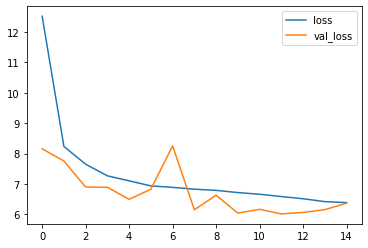

In [60]:
losses.plot()

In [78]:
losses

,loss,val_loss
0,12.518825,8.156785
1,8.234402,7.755195
2,7.649743,6.898865
3,7.268101,6.891415
4,7.103143,6.495355
5,6.936430,6.828663
6,6.888772,8.252507
7,6.828761,6.150095
8,6.789985,6.629659
9,6.717469,6.042332


In [69]:
MSE_tf=losses['loss'].values[-1]

In [71]:
RMSE_tf=np.sqrt(MSE_tf)
RMSE_tf

2.5271536565453006

### Evaluation Data

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [73]:
predictions=model.predict(X_test)

In [74]:
MAE=mean_absolute_error(y_test,predictions)

In [75]:
MAE

1.4457060008742018

In [187]:
predictions[:5]

array([[ 6.52832  ],
       [ 6.393295 ],
       [ 5.9158144],
       [29.21204  ],
       [ 6.4425855]], dtype=float32)

In [188]:
y_test[:5]

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 4.1,  6.9,  5.7, 20.5,  4.5])>

In [76]:
MSE=mean_squared_error(y_test,predictions)
MSE

6.367321216393183

In [77]:
RMSE=np.sqrt(MSE)
RMSE

2.5233551506661094

In [191]:
## Visualize our prediction in a scatter plot

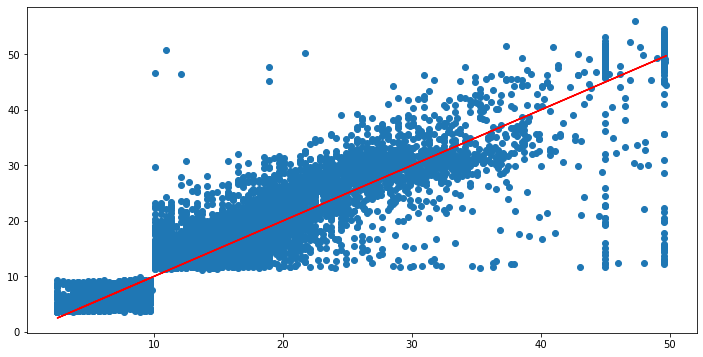

In [79]:
plt.figure(figsize=(12,6))

plt.scatter(y_test,predictions)

plt.plot(y_test,y_test,"r")


### Scikit Learn : RandomForestRegressor

In [114]:
from sklearn.preprocessing import MinMaxScaler

In [115]:
scaler=MinMaxScaler()

In [116]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [117]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((90000, 13), (30000, 13), (90000,), (30000,))

In [118]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [122]:
def fit_and_score(model,X_train,y_train,X_test,y_test):
    """"
    Takes a model, it the model with the
    data and evaluate the model with the R2 Score and RMSE
    """
    model.fit(X_train,y_train)
    y_preds=model.predict(X_test)
    score=model.score(X_test,y_test)
    MSE=mean_squared_error(y_test,y_preds)
    RMSE=np.sqrt(MSE)
    print(f"the R2 score is : {score:3.2f}")
    print(f" the RMSE is : {RMSE:3.2f}")
    

In [123]:
model=RandomForestRegressor()

In [124]:
fit_and_score(model,X_train,y_train,X_test,y_test)

the R2 score is : 90.73%
 the RMSE is : 2.27


In [125]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### GridSearchCV 

In [ ]:
grid_1={'n_estimators':[100,200,300],
        'max_depth':[None,5,10],
        'max_features':[None,'auto'],
        'min_samples_split':[None,2],
        'min_samples_leaf':[1,2,3]}  
from sklearn.model_selection import GridSearchCV
rgs=RandomForestRegressor(n_jobs=1)
gs_rgs=GridSearchCV(estimator=rgs,
                   param_grid=grid_1,
                   cv=5,
                   verbose=2)

gs_rgs.fit(X_train,y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=None, n_estimators=100; total time=   0.0s


C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_

[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=None, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=None, n_estimators=100; total time=   0.0s


C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_

[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=None, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=None, n_estimators=100; total time=   0.0s


C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_

[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=None, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=None, n_estimators=200; total time=   0.1s


C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_

[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=None, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=None, n_estimators=200; total time=   0.1s


C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_

[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=None, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=None, n_estimators=300; total time=   0.0s


C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_

[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=None, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=None, n_estimators=300; total time=   0.0s


C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_

[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=None, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=None, n_estimators=300; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.7min
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.7min
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 2.1min
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 2.0min
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.9min
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 3.7min
[CV] END max_depth

In [ ]:
y_gs_preds=gs_rgs.predict(X_test)
RMSE=np.sqrt(mean_squared_error(y_test,y_gs_preds))
print(f" the RMSE of the grid search RandomForestRegressor is : {RMSE:3.2f}%")

In [ ]:
gs_rgs.feature_importances_

In [ ]:
def plot_features(columns,importances,n=22):
    df=(pd.DataFrame({"features":columns,
                    "feature_importances": importances})
        .sort_values("feature_importances", ascending=False)
        .reset_index(drop=True))
    
    sns.barplot(x="feature_importances",
               y="features",
               data=df[:n],
               orient="h")

In [ ]:
plt.figure(figsize=(16,8))
plot_features(df.drop("fare_amount", axis=1).columns,gs_rgs.feature_importances_)

### Conclusion

* The best model is the RandomForestRegressor with Scikit Learn that yeilds a RMSE of 2.27% *